<a href="https://colab.research.google.com/github/yuhyerin/AI/blob/master/1%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import torch

In [2]:
print('Python Version')
print(sys.version)

Python Version
3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
with open('/content/drive/My Drive/Hello.txt', 'w')as f:
  f.write('Hello Google Drive!')

In [5]:
!cat /content/drive/My\ Drive/Hello.txt

Hello Google Drive!

In [6]:
import cv2
print(cv2.__version__)

3.4.3


In [0]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/coffee_cake.jpg')

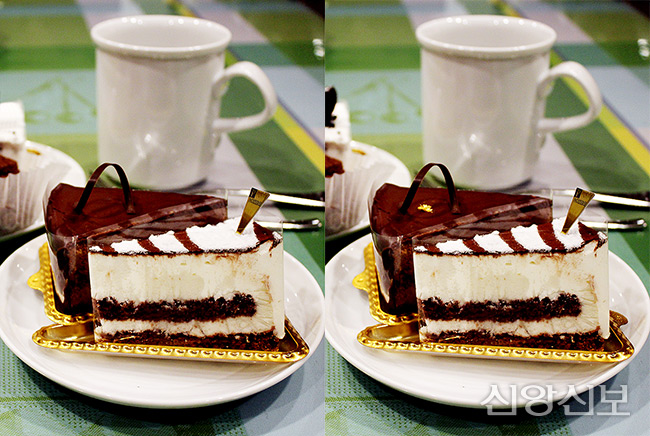

In [12]:
cv2_imshow(img)

In [13]:
print(f'img shape is: {img.shape}') #(세로길이, 가로길이, 채널수)

img shape is: (436, 650, 3)


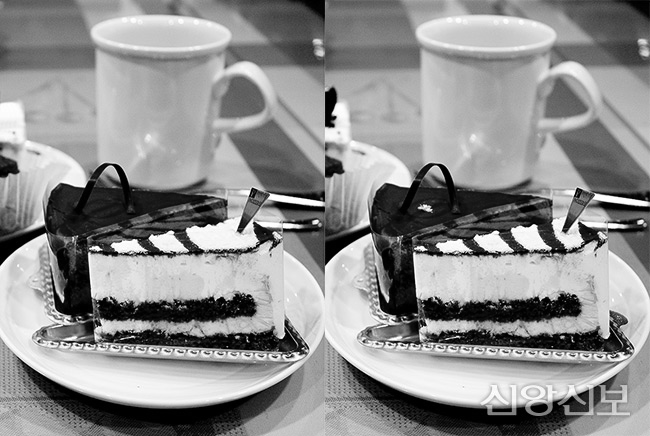

In [14]:
#cvt(convert) 컬러->BGR에서 GRAY로 바꾼다.
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

In [15]:
print(f'img shape is: {img.shape}')

img shape is: (436, 650)


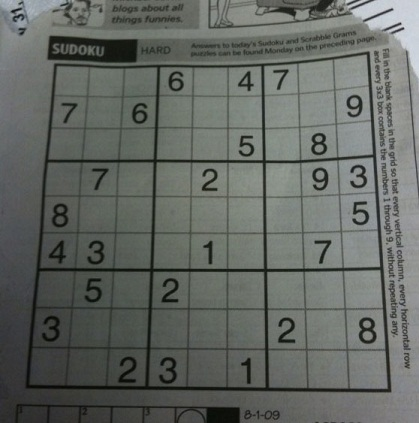

In [26]:
img=cv2.imread('/content/drive/My Drive/images/Thresholding_example.jpg')
cv2_imshow(img)

127.0


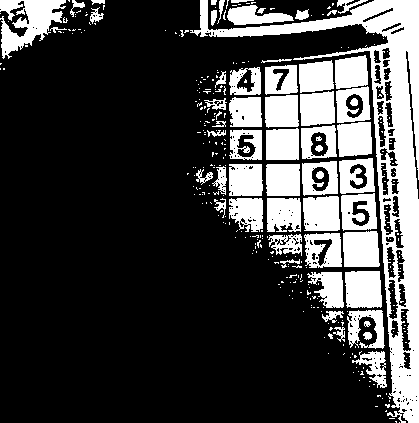

In [36]:
# Binarization (이진화 기법 ): 색깔,그레이 ->흑백
# Thresholding 기법

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drive/My Drive/images/Thresholding_example.jpg', cv2.IMREAD_GRAYSCALE)
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)
cv2_imshow(th1)

96.0


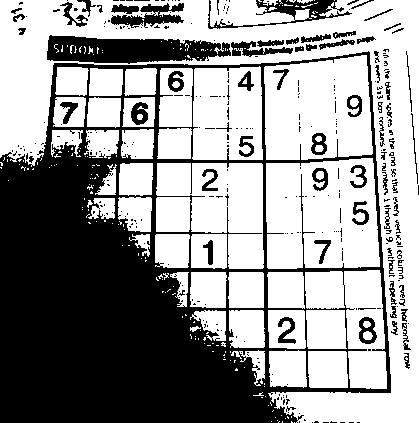

In [35]:
# Binarization (이진화 기법 ): 색깔,그레이 ->흑백
# Thresholding 기법

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/drive/My Drive/images/Thresholding_example.jpg', cv2.IMREAD_GRAYSCALE)
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU)
print(ret)
cv2_imshow(th1)

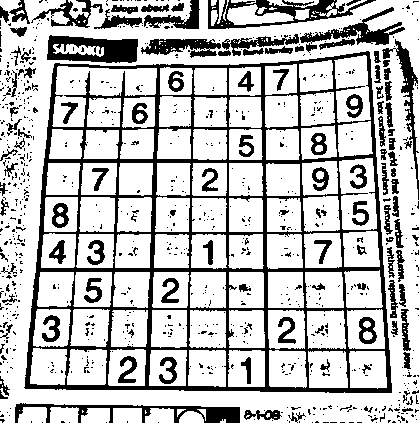

In [44]:
# Adaptive thresholding 방법
# 1) Mean-Thresholding

img=cv2.imread('/content/drive/My Drive/images/Thresholding_example.jpg', cv2.IMREAD_GRAYSCALE)
th1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 27, 2) # 내주변 반경 11개, 2만큼 threshold를 낮추겠다..
cv2_imshow(th1)


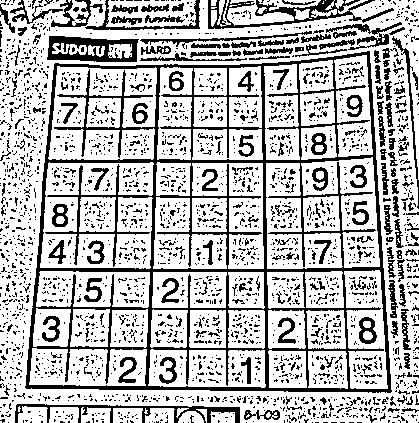

In [46]:
# Adaptive thresholding 방법
# 1) Mean-Thresholding

img=cv2.imread('/content/drive/My Drive/images/Thresholding_example.jpg', cv2.IMREAD_GRAYSCALE)
th1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2) # 내주변 반경 11개, 2만큼 threshold를 낮추겠다..
cv2_imshow(th1)


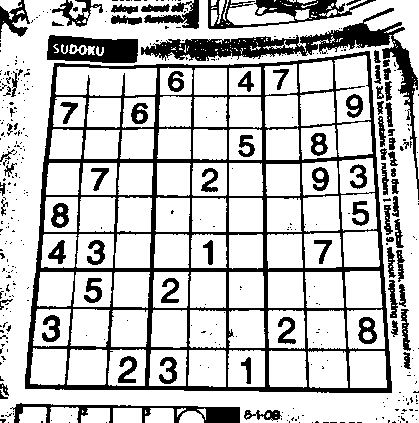

In [56]:
# 2) Gaussian-Thresholding : 가까운애들한텐 가중치를 준다.

img=cv2.imread('/content/drive/My Drive/images/Thresholding_example.jpg', cv2.IMREAD_GRAYSCALE)
th1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 2)
cv2_imshow(th1)

In [57]:
## Image arithmetic

# ADD

import cv2
import numpy as np

a=np.array([[200, 50]], dtype=np.uint8)
b=np.array([[100,100]], dtype=np.uint8)

add_result = cv2.add(a,b)
print(add_result)

[[255 150]]


In [58]:
# SUB

sub_result = cv2.subtract(b,a)
print(sub_result)

[[ 0 50]]


In [0]:
# Alpha Blending

import cv2
import numpy as np

city_img = cv2.imread('/content/drive/My Drive/images/city.jpg')
beach_img = cv2.imread('/content/drive/My Drive/images/beach.jpg')

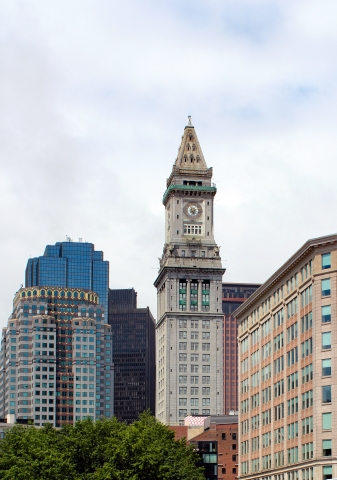

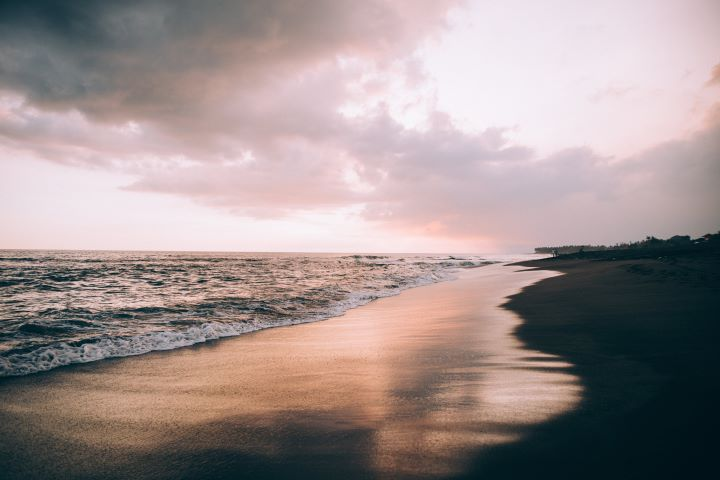

In [60]:
cv2_imshow(city_img)
cv2_imshow(beach_img)

In [61]:
ch, cw, _ = city_img.shape
bh, bw, _ = beach_img.shape
print('city img shape: ', ch, cw)
print('beach img shape: ', bh, bw)

city img shape:  480 337
beach img shape:  480 720


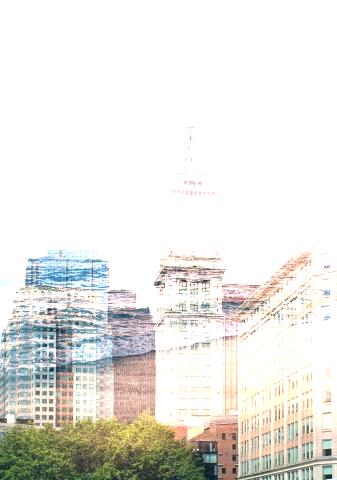

In [62]:
# 단순한 더하기
add_result= cv2.add(city_img, beach_img[:, :cw])
cv2_imshow(add_result)

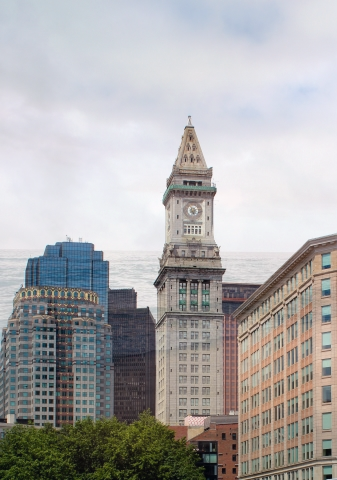

In [66]:
# Alpha blending 이용
blend_result= city_img*0.8 + beach_img[:, :cw]*0.2
cv2_imshow(blend_result)

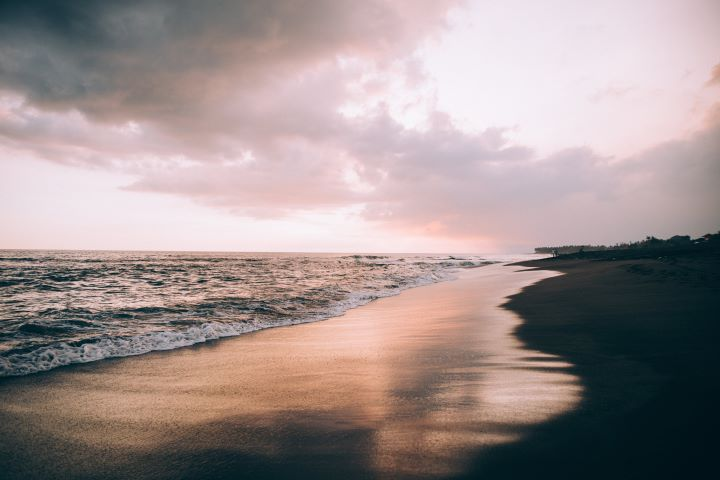

In [98]:
cv2_imshow(beach_img)

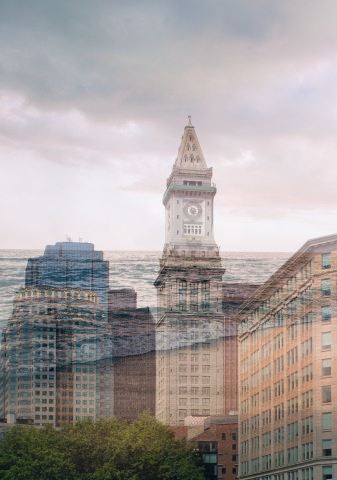

In [99]:
# addWeighted( )이용

alpha=0.5
blend_result3 = cv2.addWeighted(city_img, 1-alpha, beach_img[:, :cw], alpha, 0)
cv2_imshow(blend_result3)

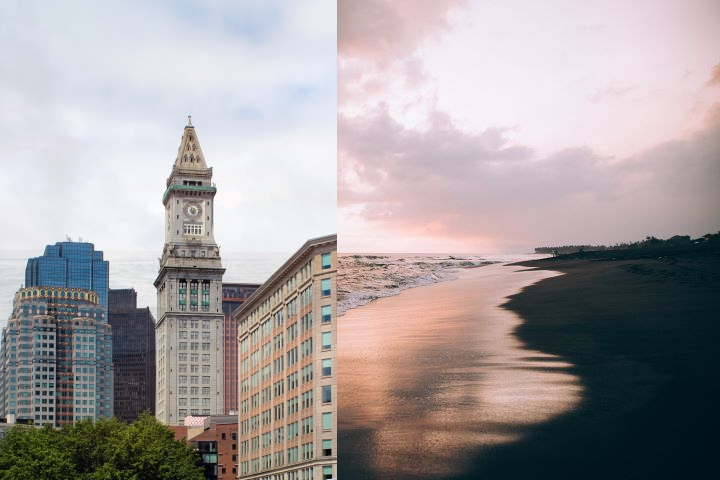

In [80]:
beach_img[:, :cw]=blend_result3
cv2_imshow(beach_img)

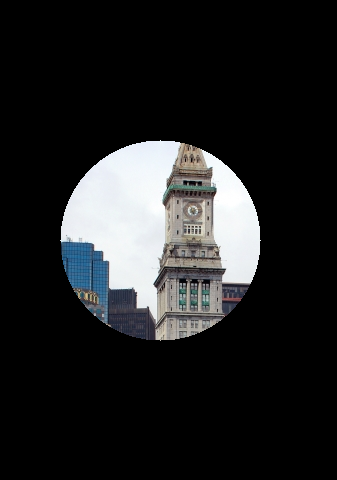

In [85]:
## Bitwise operation : and, or, xor, not

city_img = cv2.imread('/content/drive/My Drive/images/city.jpg')
mask= np.zeros_like(city_img)
cv2.circle(mask, (160,240), 100, (255,255,255), -1) # -1의 의미 : 검정색 이미지의 중심(160,240)에 반지름 100인 하얀원, 내부를 채운다.
masked_city = cv2.bitwise_and(city_img, mask)
cv2_imshow(masked_city)